In [1]:
!pip install wordcloud

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
df = pd.read_csv(r"C:\Users\Swagatika Samal\Desktop\documents\DATA IS GOOD\Unmessenger\2676439-Assignment_4_Dataset_2_(1205)\Assignment 4 Dataset 1 (1205).csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,07-05-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


EDA for 1st DATASET

In [4]:
df.shape

(249, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              249 non-null    int64  
 1   name                            249 non-null    object 
 2   host_id                         249 non-null    int64  
 3   host_name                       249 non-null    object 
 4   neighbourhood_group             249 non-null    object 
 5   neighbourhood                   249 non-null    object 
 6   latitude                        249 non-null    float64
 7   longitude                       249 non-null    float64
 8   room_type                       249 non-null    object 
 9   price                           249 non-null    int64  
 10  minimum_nights                  249 non-null    int64  
 11  number_of_reviews               249 non-null    int64  
 12  last_review                     242 

In [6]:
#The dataset has 249 rows and 16 columns
#The dataset has last_review as incorrect datatype

In [7]:
# convert the 'last_review' column to datetime format
df['last_review']= pd.to_datetime(df['last_review'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              249 non-null    int64         
 1   name                            249 non-null    object        
 2   host_id                         249 non-null    int64         
 3   host_name                       249 non-null    object        
 4   neighbourhood_group             249 non-null    object        
 5   neighbourhood                   249 non-null    object        
 6   latitude                        249 non-null    float64       
 7   longitude                       249 non-null    float64       
 8   room_type                       249 non-null    object        
 9   price                           249 non-null    int64         
 10  minimum_nights                  249 non-null    int64         
 11  number

In [9]:
df.describe(include=np.number)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,249.000000,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000,242.000000,249.000000,249.000000
mean,31376.771084,1.499884e+05,40.730257,-73.964044,143.971888,8.718876,103.445783,1.091653,1.738956,198.538153
std,18101.018309,4.010393e+05,0.049660,0.029685,91.442975,20.398680,100.337887,1.000168,1.234635,126.048056
min,2539.000000,2.787000e+03,40.631880,-74.080880,35.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,15711.000000,5.014800e+04,40.688430,-73.984980,85.000000,2.000000,21.000000,0.280000,1.000000,75.000000
50%,28321.000000,9.779700e+04,40.721620,-73.964280,125.000000,3.000000,73.000000,0.795000,1.000000,225.000000
75%,46911.000000,1.936370e+05,40.761930,-73.948220,175.000000,5.000000,166.000000,1.650000,2.000000,310.000000
max,62430.000000,6.197784e+06,40.867540,-73.765970,800.000000,200.000000,467.000000,4.720000,6.000000,365.000000


In [10]:
df.describe(include=object)

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,249,249,249,249,249
unique,249,204,5,55,3
top,Couldn't Be Closer To Columbia Uni,Mark,Manhattan,Williamsburg,Entire home/apt
freq,1,6,124,26,134


In [11]:
cat_cols = df.select_dtypes(include = 'object')
num_cols = df.select_dtypes(include = np.number)
print('Continuous variables are : ',num_cols.columns)
print('Categorical Columns are : ',cat_cols.columns)

Continuous variables are :  Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')
Categorical Columns are :  Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type'],
      dtype='object')


In [12]:
#Displaying unique values in categorical columns
for x in cat_cols:
    print(x, '\n')
    print(df[x].unique(),'\n')

name 

['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' 'Cozy Entire Floor of Brownstone'
 'Entire Apt: Spacious Studio/Loft by central park'
 'Large Cozy 1 BR Apartment In Midtown East' 'BlissArtsSpace!'
 "Large Furnished Room Near B'way " 'Cozy Clean Guest Room - Family Apt'
 'Cute & Cozy Lower East Side 1 bdrm' 'Beautiful 1br on Upper West Side'
 'Central Manhattan/near Broadway'
 'Lovely Room 1, Garden, Best Area, Legal rental'
 'Wonderful Guest Bedroom in Manhattan for SINGLES'
 'West Village Nest - Superhost' 'Only 2 stops to Manhattan studio'
 'Perfect for Your Parents + Garden' 'Chelsea Perfect'
 'Hip Historic Brownstone Apartment with Backyard'
 'Huge 2 BR Upper East  Cental Park' 'Sweet and Spacious Brooklyn Loft'
 'CBG CtyBGd HelpsHaiti rm#1:1-4' 'CBG Helps Haiti Room#2.5'
 'CBG Helps Haiti Rm #2' 'MAISON DES SIRENES1,bohemian apartment'
 'Sunny Bedroom Across Prospect Park'
 'Magnifique Suite au N de Manhattan - vue Cloitr

In [13]:
#Check for null values
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       7
reviews_per_month                 7
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [14]:
#Display rows with null values
df1 = df[df.isnull().any(axis=1)]
df1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365
193,51438,1 Bedroom in 2 Bdrm Apt- Upper East,236421,Jessica,Manhattan,Upper East Side,40.77333,-73.95199,Private room,130,14,0,NaT,NaN,2,0
204,54466,Beautiful Uptown Manhattan apartmnt,253385,Douglas,Manhattan,Harlem,40.80234,-73.95603,Private room,200,30,0,NaT,NaN,1,365


In [15]:
# fill missing value reviews_per_month
df["reviews_per_month"].fillna(0, inplace = True)  

In [16]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       7
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
#Checking for unique values in last_review column
df['last_review'].unique()

array(['2018-10-19T00:00:00.000000000', '2019-05-21T00:00:00.000000000',
                                 'NaT', '2019-07-05T00:00:00.000000000',
       '2018-11-19T00:00:00.000000000', '2019-06-22T00:00:00.000000000',
       '2017-10-05T00:00:00.000000000', '2019-06-24T00:00:00.000000000',
       '2017-07-21T00:00:00.000000000', '2019-06-09T00:00:00.000000000',
       '2019-06-23T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2019-06-29T00:00:00.000000000', '2019-06-28T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2011-12-28T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2019-07-02T00:00:00.000000000',
       '2019-06-19T00:00:00.000000000', '2017-08-13T00:00:00.000000000',
       '2019-06-15T00:00:00.000000000', '2019-04-19T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000', '2019-06-14T00:00:00.000000000',
       '2019-05-12T00:00:00.000000000', '2019-06-21T00:00:00.000000000',
       '2019-05-27T00:00:00.000000000', '2018-09-30

In [18]:
#Since, there is no proper pattern, we can fil null value with previous data
df['last_review'].fillna(method ='pad', inplace=True)

In [19]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [20]:
#We can see there are no more null values

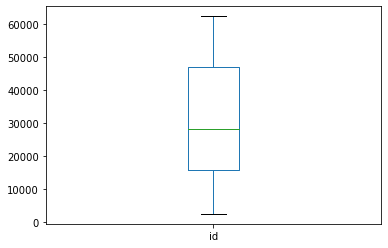

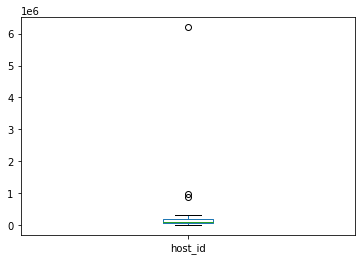

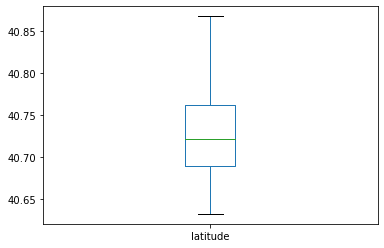

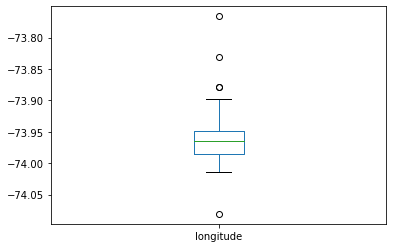

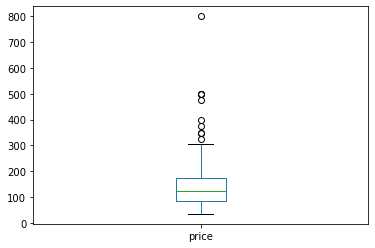

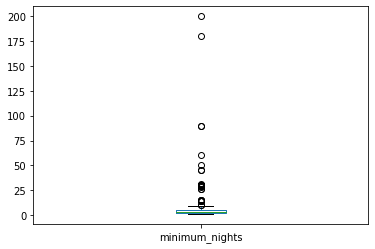

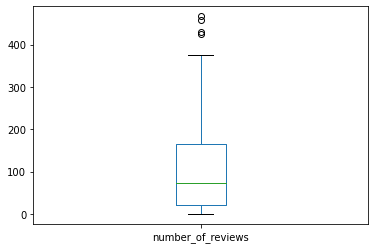

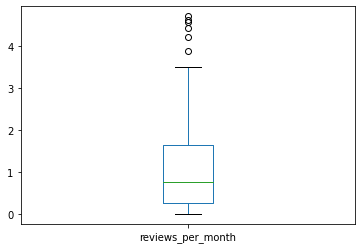

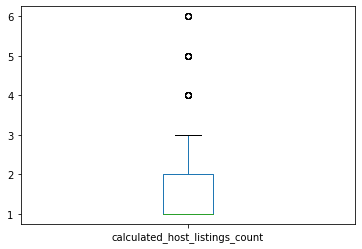

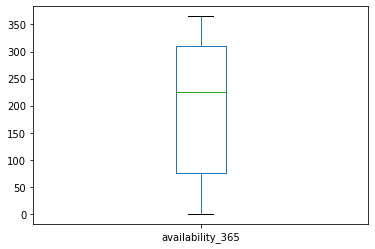

In [21]:
#checking for outliers in numerical columns using box plot
for cols in num_cols:
    df[cols].plot(kind='box')
    plt.show()

1.visualize the most frequent words in listing names using Word Cloud

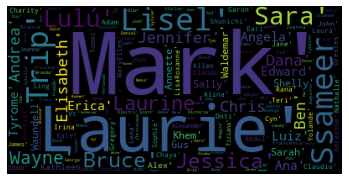

In [22]:
text = df['host_name'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [23]:
#Here we can see Mr.Mark and Miss Laurie are the two hosts whose rentals are preferred most

2.visualize the most frequent words in neighbourhood_group using Word Cloud

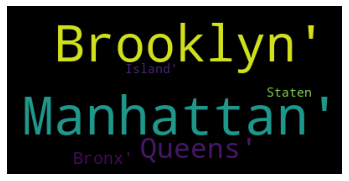

In [24]:
text = df['neighbourhood_group'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [25]:
#Here we can see Brooklyn and Manhattan are the most preferred city for staying.

3.Display the average price and count of reviews for different room types 

In [26]:
dfp = pd.pivot_table(df, values=['price', 'number_of_reviews'], index=['room_type'], 
                                aggfunc={'price': np.mean, 'number_of_reviews': np.sum})

dfp

,number_of_reviews,price
room_type,,
Entire home/apt,12033,188.574627
Private room,13501,92.345133
Shared room,224,72.500000


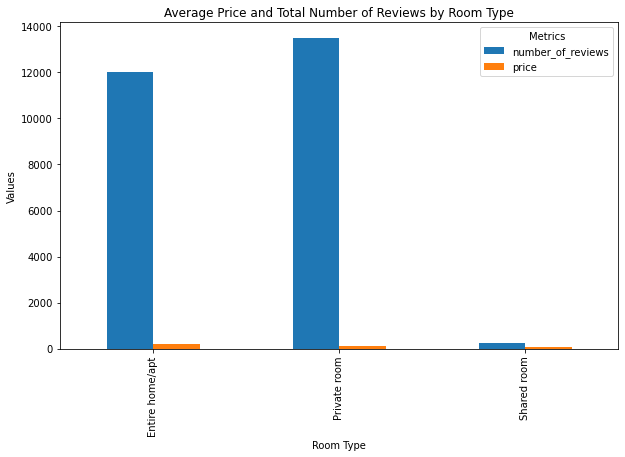

In [27]:
dfp.plot(kind='bar', figsize=(10, 6))

plt.title('Average Price and Total Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Values')
plt.legend(title='Metrics', loc='upper right')

plt.show()

In [28]:
dfp = pd.pivot_table(df, values=['price'], index=['room_type'], 
                                aggfunc=np.mean)

dfp

,price
room_type,
Entire home/apt,188.574627
Private room,92.345133
Shared room,72.500000


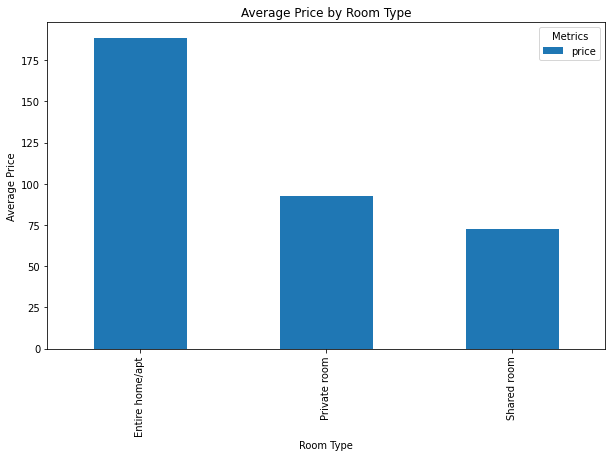

In [29]:
dfp.plot(kind='bar', figsize=(10, 6))

plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.legend(title='Metrics', loc='upper right')

plt.show()

In [30]:
#Above graph depicts hiring an entire home or apartment is a costly affair.

In [31]:
dfp = pd.pivot_table(df, values=['number_of_reviews'], index=['room_type'], 
                                aggfunc= np.sum)

dfp

,number_of_reviews
room_type,
Entire home/apt,12033
Private room,13501
Shared room,224


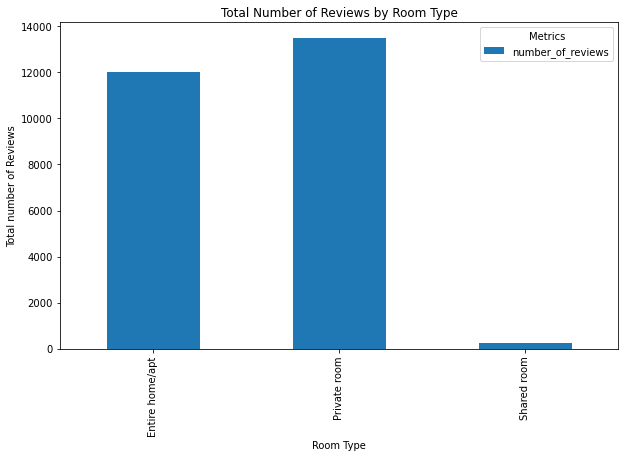

In [32]:
dfp.plot(kind='bar', figsize=(10, 6))

plt.title('Total Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Total number of Reviews')
plt.legend(title='Metrics', loc='upper right')

plt.show()

In [33]:
#In above graph we can depict guests prefer to stay in a private room and does not take much interest in shared room

4.Display the average price and count of reviews for different neighborhood groups.

In [34]:
dfp = pd.pivot_table(df, values=['price', 'number_of_reviews'], index=['neighbourhood_group'], 
                                aggfunc={'price': np.mean, 'number_of_reviews': np.sum})

dfp

,number_of_reviews,price
neighbourhood_group,,
Bronx,357,42.500000
Brooklyn,12571,137.459459
Manhattan,12205,151.846774
Queens,459,146.090909
Staten Island,166,70.000000


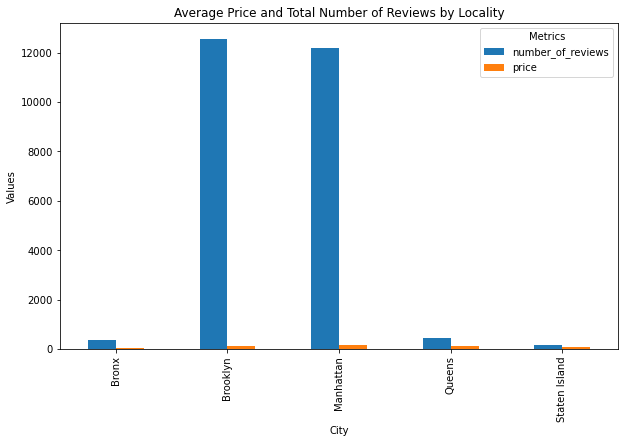

In [35]:
dfp.plot(kind='bar', figsize=(10, 6))

plt.title('Average Price and Total Number of Reviews by Locality')
plt.xlabel('City')
plt.ylabel('Values')
plt.legend(title='Metrics', loc='upper right')

plt.show()

In [36]:
dfp = pd.pivot_table(df, values=['price'], index=['neighbourhood_group'], 
                                aggfunc=np.mean)

dfp

,price
neighbourhood_group,
Bronx,42.500000
Brooklyn,137.459459
Manhattan,151.846774
Queens,146.090909
Staten Island,70.000000


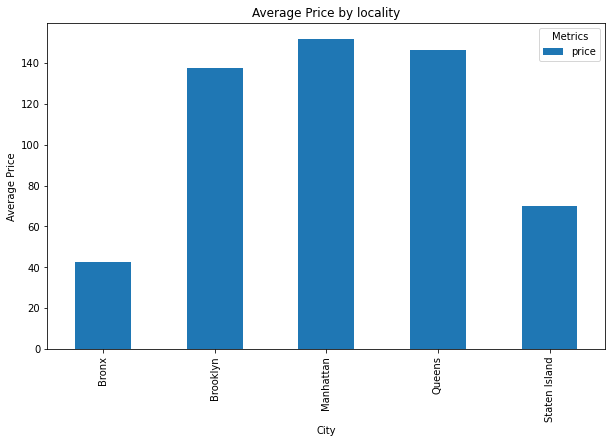

In [37]:
dfp.plot(kind='bar', figsize=(10, 6))

plt.title('Average Price by locality')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.legend(title='Metrics', loc='upper right')

plt.show()

In [38]:
#The above graph depicts Manhatten, Queens and Brooklyn are highly priced cities

In [39]:
dfp = pd.pivot_table(df, values=['number_of_reviews'], index=['neighbourhood_group'], 
                                aggfunc=np.sum)

dfp

,number_of_reviews
neighbourhood_group,
Bronx,357
Brooklyn,12571
Manhattan,12205
Queens,459
Staten Island,166


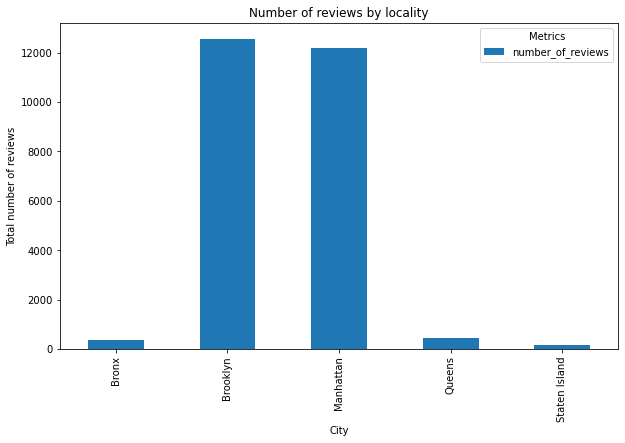

In [40]:
dfp.plot(kind='bar', figsize=(10, 6))

plt.title('Number of reviews by locality')
plt.xlabel('City')
plt.ylabel('Total number of reviews')
plt.legend(title='Metrics', loc='upper right')

plt.show()

In [41]:
#Brooklyn and manhattan are the most preferred city

5.Visualize price trend and review trend over a period of time

In [42]:
df_price_trend = df.groupby('last_review')['price'].mean()
df_price_trend

last_review
2011-04-25    250.000000
2011-09-18     90.000000
2011-09-19    140.000000
2011-12-10    100.000000
2011-12-28    299.000000
                 ...    
2019-07-03     74.500000
2019-07-04     40.000000
2019-07-05     71.333333
2019-07-06    225.000000
2019-07-07    145.500000
Name: price, Length: 129, dtype: float64

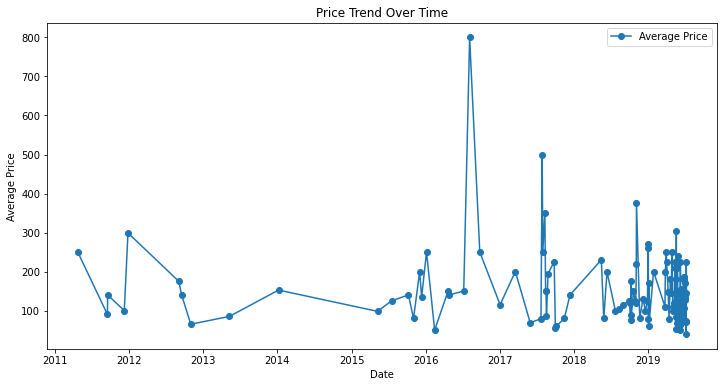

In [43]:
# Plotting price trend
plt.figure(figsize=(12, 6))
plt.plot(df_price_trend.index, df_price_trend.values, label='Average Price', marker='o')
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()

In [44]:
#In the above line plot we can visualize, there is ups and downs in the average price of the listings till 2016
#Between 2016 and 2017, there is sudden spike and then its again increase-decrease pattern for 2018 and 2019.
#so, property has been booked most or with higher price between 2016 and 2017

In [45]:
df_reviews_trend = df.groupby('last_review')['number_of_reviews'].sum()
df_reviews_trend

last_review
2011-04-25     14
2011-09-18      9
2011-09-19      1
2011-12-10     25
2011-12-28      9
             ... 
2019-07-03    718
2019-07-04    219
2019-07-05    597
2019-07-06    222
2019-07-07    154
Name: number_of_reviews, Length: 129, dtype: int64

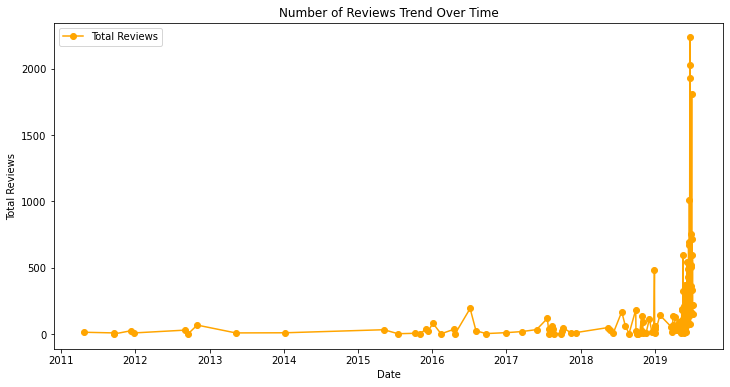

In [46]:
# Plotting number of reviews trend
plt.figure(figsize=(12, 6))
plt.plot(df_reviews_trend.index, df_reviews_trend.values, label='Total Reviews', marker='o', color='orange')
plt.title('Number of Reviews Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Reviews')
plt.legend()
plt.show()

In [47]:
# The graph depicts guests mostly started reviewing from 2016. Maximum reviews have been counted after 2019.

EDA for 2nd DATASET

In [48]:
dfa = pd.read_csv(r"C:\Users\Swagatika Samal\Desktop\documents\DATA IS GOOD\Unmessenger\2676439-Assignment_4_Dataset_2_(1205)\Assignment 4 Dataset 2 (1205).csv")
dfa.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [49]:
dfa.shape

(311, 36)

In [50]:
#The dataset has 311 rows and 36 columns

In [51]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [52]:
dfa.describe(include=np.number)

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [53]:
dfa.describe(include=object)

,Employee_Name,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,LastPerformanceReview_Date
count,311,311,311,311,311,311,311,311,311,311,104,311,311,311,311,311,311,311
unique,311,32,28,307,2,5,3,4,6,101,96,18,3,6,21,9,4,137
top,"Del Bosque, Keyla",Production Technician I,MA,09/09/65,F,Single,US Citizen,No,White,1/10/2011,9/7/2015,N/A-StillEmployed,Active,Production,Kelley Spirea,Indeed,Fully Meets,1/14/2019
freq,1,137,276,2,176,137,295,282,187,14,2,207,207,209,22,87,243,18


In [54]:
cat_cols = dfa.select_dtypes(include = 'object')
num_cols = dfa.select_dtypes(include = np.number)
print('Continuous variables are : ',num_cols.columns)
print('Categorical Columns are : ',cat_cols.columns)

Continuous variables are :  Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Zip', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences'],
      dtype='object')
Categorical Columns are :  Index(['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'LastPerformanceReview_Date'],
      dtype='object')


In [55]:
#Displaying unique values in categorical columns
for x in cat_cols:
    print(x, '\n')
    print(dfa[x].unique(),'\n')

Employee_Name 

['Adinolfi, Wilson  K' 'Ait Sidi, Karthikeyan   ' 'Akinkuolie, Sarah'
 'Alagbe,Trina' 'Anderson, Carol ' 'Anderson, Linda  ' 'Andreola, Colby'
 'Athwal, Sam' 'Bachiochi, Linda' 'Bacong, Alejandro '
 'Baczenski, Rachael  ' 'Barbara, Thomas' 'Barbossa, Hector'
 'Barone, Francesco  A' 'Barton, Nader' 'Bates, Norman' 'Beak, Kimberly  '
 'Beatrice, Courtney ' 'Becker, Renee' 'Becker, Scott' 'Bernstein, Sean'
 'Biden, Lowan  M' 'Billis, Helen' 'Blount, Dianna' 'Bondwell, Betsy'
 'Booth, Frank' 'Boutwell, Bonalyn' 'Bozzi, Charles' 'Brill, Donna'
 'Brown, Mia' 'Buccheri, Joseph  ' 'Bugali, Josephine ' 'Bunbury, Jessica'
 'Burke, Joelle' 'Burkett, Benjamin ' 'Cady, Max ' 'Candie, Calvin'
 'Carabbio, Judith' 'Carey, Michael  ' 'Carr, Claudia  N'
 'Carter, Michelle ' 'Chace, Beatrice ' 'Champaigne, Brian' 'Chan, Lin'
 'Chang, Donovan  E' 'Chigurh, Anton' 'Chivukula, Enola'
 'Cierpiszewski, Caroline  ' 'Clayton, Rick' 'Cloninger, Jennifer'
 'Close, Phil' 'Clukey, Elijian' 'Cockel, 

In [56]:
#Above we can observe date columns are in obect datatype. we need to correct the datatype

In [57]:
# convert the 'DOB' column to datetime format
dfa['DOB']= pd.to_datetime(dfa['DOB'])

In [58]:
# convert the 'DateofHire' column to datetime format
dfa['DateofHire']= pd.to_datetime(dfa['DateofHire'])

In [59]:
# convert the 'DateofTermination' column to datetime format
dfa['DateofTermination']= pd.to_datetime(dfa['DateofTermination'])

In [60]:
# convert the 'LastPerformanceReview_Date' column to datetime format
dfa['LastPerformanceReview_Date']= pd.to_datetime(dfa['LastPerformanceReview_Date'])

In [61]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [62]:
#Checking for null values
dfa.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [63]:
#Here we can see more than 50 percent data missing in DateofTermination column.Hence, we need to drop the column.

In [64]:
#dfa.drop('DateofTermination', axis=1, inplace=True)

In [65]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [66]:
#Display rows with null values
df2 = dfa[dfa.isnull().any(axis=1)]
df2

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,2019-01-07,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,2019-01-02,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2019-02-25,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Wolk, Hang T",10174,0,0,0,1,5,3,0,60446,...,David Stanley,14.0,LinkedIn,Fully Meets,3.40,4,0,2019-02-21,0,14
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2019-02-28,0,13
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2019-02-21,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2019-02-01,0,11


In [67]:
#Checking for Manager id where manager name is Webster Butler
dfm = dfa[dfa['ManagerName'] == 'Webster Butler']
dfm

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2
19,"Becker, Scott",10277,0,0,1,3,5,3,0,53250,...,Webster Butler,NaN,LinkedIn,Fully Meets,4.20,4,0,2019-01-11,0,13
30,"Buccheri, Joseph",10184,0,0,1,1,5,3,0,65288,...,Webster Butler,NaN,Google Search,Fully Meets,3.19,3,0,2019-02-01,0,9
44,"Chang, Donovan E",10154,0,0,1,1,5,3,0,60380,...,Webster Butler,NaN,LinkedIn,Fully Meets,3.80,5,0,2019-01-14,0,4
65,"DeGweck, James",10070,1,1,1,5,5,3,0,55722,...,Webster Butler,39.0,Indeed,Fully Meets,5.00,4,0,2016-04-02,0,14
88,"Fancett, Nicole",10136,0,0,0,1,5,3,0,65902,...,Webster Butler,NaN,LinkedIn,Fully Meets,4.00,4,0,2019-01-07,0,7
89,"Ferguson, Susan",10189,1,1,0,5,5,3,0,57748,...,Webster Butler,39.0,Google Search,Fully Meets,3.13,3,0,2016-02-04,0,16
105,"Gilles, Alex",10283,1,1,1,5,5,2,1,54933,...,Webster Butler,39.0,Diversity Job Fair,Needs Improvement,3.97,4,0,2015-01-20,3,15
124,"Harrington, Christie",10097,0,0,0,5,5,3,0,52177,...,Webster Butler,39.0,CareerBuilder,Fully Meets,4.64,4,0,2015-05-02,0,8
135,"Hutter, Rosalie",10214,0,3,0,2,5,3,0,64995,...,Webster Butler,NaN,Indeed,Fully Meets,4.50,3,0,2019-02-14,0,6


In [68]:
#We can impute ManagerId = 39.0 from above analysis
dfa['ManagerID'].fillna(39.0, inplace=True)

In [69]:
dfa.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       0
RecruitmentSource               0
PerformanceSco

In [70]:
#We can see there are no more null values

VISUALIZE THE DATA

1.Salary distribution by Department

<AxesSubplot:title={'center':'Salary'}, xlabel='Department'>

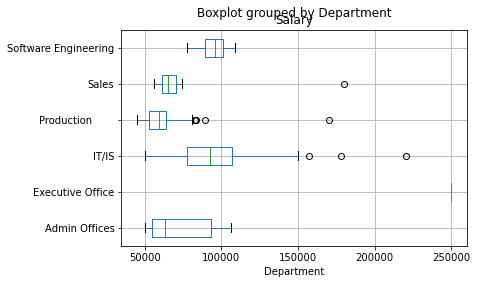

In [71]:
# Box Plot: Salary distribution by Department
dfa.boxplot(column='Salary', by='Department', grid=True, vert=False)

In [72]:
#From the figure, we can understand employees working in admin department has a salary bracket of 50000 to 100000INR
#Also IT/IS employees receive more salary compared to other departments.It has also wider salary bracket with outliers receiving more than 200000INR

<AxesSubplot:title={'center':'Department-wise Salary Distribution'}, ylabel='Salary'>

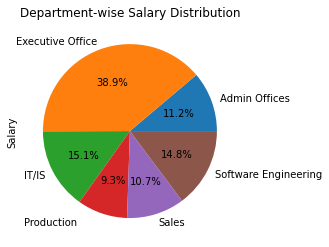

In [73]:
# Pie Chart: Department-wise Salary distribution
dfa.groupby('Department')['Salary'].mean().plot.pie(title='Department-wise Salary Distribution', autopct='%1.1f%%')

In [74]:
#Employees in the Executive Department receive the highest average salary among all departments.

2. Visualize employee status for each department

In [75]:
dfp = pd.pivot_table(dfa, values=['EmpID'], index=['Department'], columns =['EmploymentStatus'], 
                                aggfunc=np.sum, fill_value = 0)

dfp

EmpID                                            
EmploymentStatus       Active Terminated for Cause Voluntarily Terminated
Department                                                               
Admin Offices           70757                10182                  10153
Executive Office        10089                    0                      0
IT/IS                  405744                40808                  60987
Production            1279094                81631                 762164
Sales                  264547                20447                  30541
Software Engineering    70844                10290                  30238

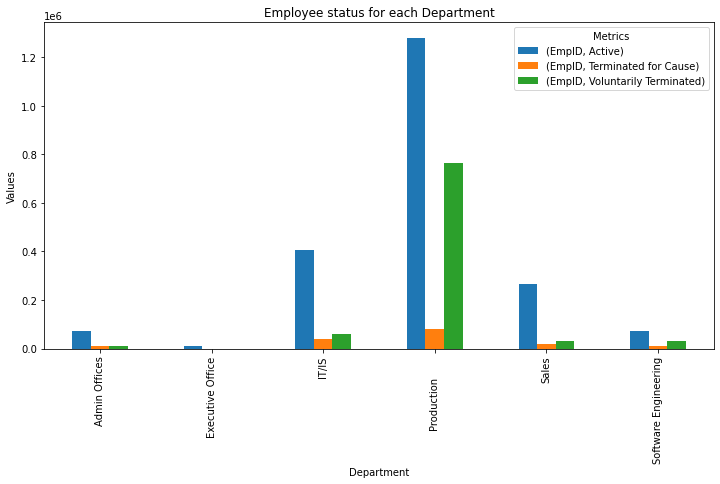

In [76]:
dfp.plot(kind='bar', figsize=(12, 6))

plt.title('Employee status for each Department')
plt.xlabel('Department')
plt.ylabel('Values')
plt.legend(title='Metrics', loc='upper right')

plt.show()

In [77]:
#above graph depicts maximum number of employees retained as well as terminated in Production Department

3.Visualize performance score for employees for each department

In [78]:
dfpivot = pd.pivot_table(dfa, values=['EmpID'], index=['Department'], columns =['PerformanceScore'], 
                                aggfunc=np.sum, fill_value = 0)

dfpivot

EmpID                                     
PerformanceScore     Exceeds Fully Meets Needs Improvement    PIP
Department                                                       
Admin Offices              0       91092                 0      0
Executive Office           0       10089                 0      0
IT/IS                  60089      426853             10288  10309
Production            270566     1615578            154324  82421
Sales                  20019      244003             10291  41222
Software Engineering   20029       81053             10290      0

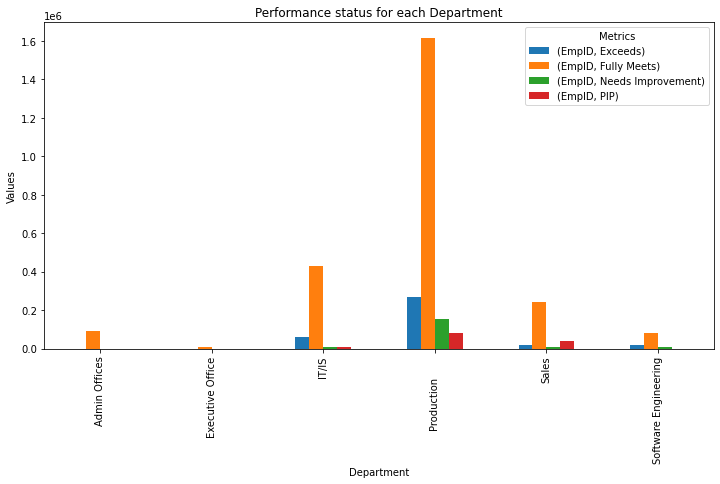

In [79]:
dfpivot.plot(kind='bar', figsize=(12, 6))

plt.title('Performance status for each Department')
plt.xlabel('Department')
plt.ylabel('Values')
plt.legend(title='Metrics', loc='upper right')

plt.show()

In [80]:
#From the graph we can depict Production Department is the best performing department 
# Also the number of employees and the performance score analysis from the above 2 graphs determines its a production based company.

4. Visualize Employment Satisfaction

<AxesSubplot:title={'center':'Employment satisfaction percentage'}, ylabel='EmpID'>

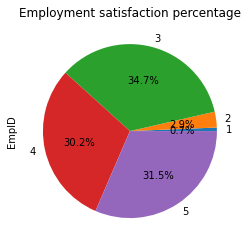

In [81]:
# Pie Chart: Employment satisfaction
dfa.groupby('EmpSatisfaction')['EmpID'].sum().plot.pie(title='Employment satisfaction percentage', autopct='%1.1f%%')

In [82]:
#The data indicates that employees express high levels of satisfaction while working at the company.
#This statement reflects a positive sentiment regarding employee satisfaction based on the dataset. 

5. Visualize Employment Recruitment Source

<AxesSubplot:title={'center':'Employment satisfaction percentage'}, ylabel='EmpID'>

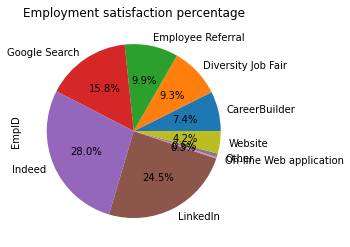

In [83]:
# Pie Chart: Employment satisfaction
dfa.groupby('RecruitmentSource')['EmpID'].sum().plot.pie(title='Employment satisfaction percentage', autopct='%1.1f%%')

In [84]:
#The primary sources for recruitment in the company are Indeed and LinkedIn, with a notable number of employees also recruited through Google searches